# `porosity`
Porosity is the void volume divided by the bulk volume. In a boolean image this can be calculated with ``im.sum()/im.size``, assuming the void voxels are labeled ``True``.  It can be slightly more complicated however, if the image does not fill up the full array (i.e. ``im.size`` is not the bulk volume) or if the there are other values in the image besides ``True`` (i.e. it's not obvious what is void space).  The ``porosity`` function works as ``np.sum(im == 1)/np.sum(im == 0)``. This means that any voxels marked something else are ignored.  It's still very simple, but is more robust which comes in handy.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()

## `im`
In its basic form a binary image is fine:

In [6]:
im = ps.generators.blobs(shape=[200, 200], seed=0)
e = ps.metrics.porosity(im)
print(e)

0.5


However, if the image is has some unfilled space, the around a cylindrical tomogram, then it can be labelled as 2 so it's ignored:

0.4968664536741214


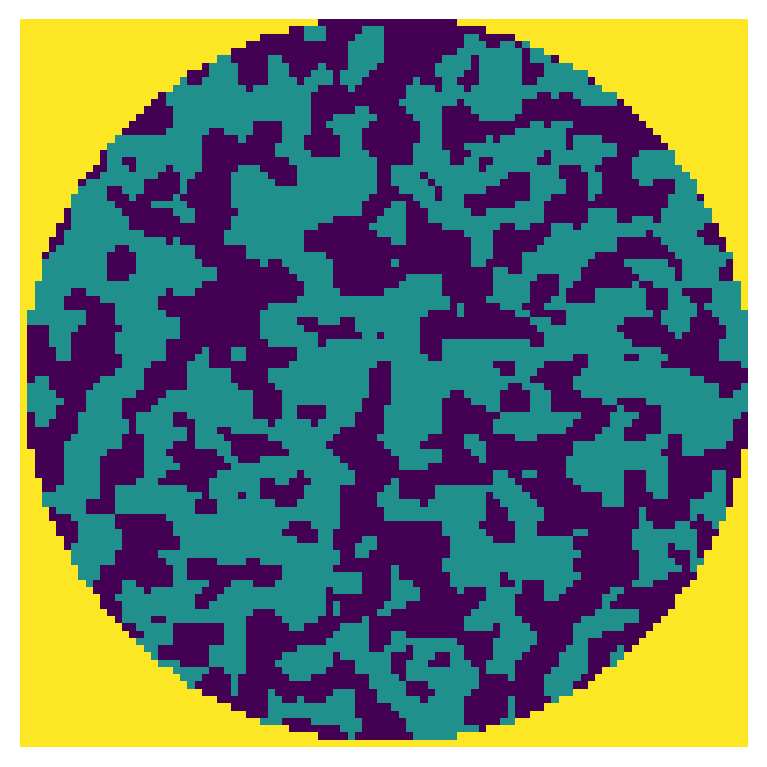

In [7]:
im = ps.generators.blobs(shape=[100, 100, 100], porosity=0.5, blobiness=2).astype(int)
cyl = ps.generators.cylindrical_plug(shape=im.shape, axis=0)
im[~cyl] = 2

fig, ax = plt.subplots(figsize=[4, 5])
ax.imshow(im[50, ...], interpolation="none", origin="lower")
ax.axis(False)

e = ps.metrics.porosity(im)
print(e)

The porosity specified when generating the blobs image was 50%, and the computed porosity is also 50%, despite having a regions of 2's around the outside.